In [1]:
# Preliminaries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# disable warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.stattools import coint

<AxesSubplot:xlabel='date'>

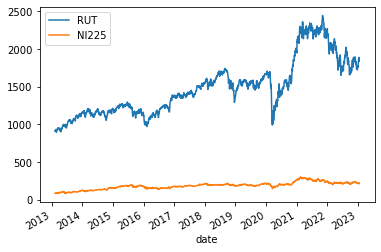

In [3]:
root = 'C:/Users/Bowen/Desktop/IAQF/Data/'
df = pd.read_csv(root + 'all_data.csv', index_col='date', parse_dates=True)
pairs = ['RUT', 'NI225']
MID = pairs[0]
NDX = pairs[1]
df = df[[MID, NDX]]
df.plot()

<AxesSubplot:xlabel='date'>

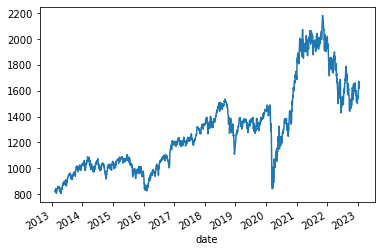

In [4]:
(df.iloc[:,0] - df.iloc[:,1]).plot()

In [5]:
# correlation
def correlation(df):
    return df.iloc[:,0].corr(df.iloc[:,1])

# Jarque Bera test for normality
# if diff follow normal dist, small p val == normal (i.e. skweness and kurtosis = 0)
def check_normal(df):
    return stats.jarque_bera(df.iloc[:,0] - df.iloc[:,1])

# Augmented Dickey-Fuller test for stationarity (only return test statistic and p val)
# small p val == stationary
def check_stationary(df):
    return [adfuller(df.iloc[:,0])[:2], adfuller(df.iloc[:,1])[:2]]

# check for cointegration
# return t stats and p value
def check_cointegration(df):
    return coint(df.iloc[:,0], df.iloc[:,1])[:2]

# ljung-box test for autocorrelation 
# small p val == autocorrelation
def check_autocorrelation(df):
    return [[acorr_ljungbox(df.iloc[:,0], lags=[1], return_df=True).iloc[0,0], 
             acorr_ljungbox(df.iloc[:,0], lags=[1], return_df=True).iloc[0,1]], 
            [acorr_ljungbox(df.iloc[:,1], lags=[1], return_df=True).iloc[0,0], 
             acorr_ljungbox(df.iloc[:,1], lags=[1], return_df=True).iloc[0,1]]]

# Engle's test for ARCH (only return lagrange multiplier test stat and p val)
# small p val == ARCH effect present
def check_arch(df):
    return [het_arch(df.iloc[:,0])[:2], het_arch(df.iloc[:,1])[:2]]


In [6]:
correlation(df)

0.9165288161389337

In [7]:
check_normal(df)
# normal dist

Jarque_beraResult(statistic=206.84966974318726, pvalue=0.0)

In [8]:
check_stationary(df)
# non-stationary

[(-1.6620733807912833, 0.4507516596696639),
 (-2.2167770969922516, 0.20021278335024112)]

In [9]:
df[:"2019-01-01"]

,RUT,NI225
date,,
2013-02-07,908.099976,86.662116
2013-02-08,913.669983,84.079609
2013-02-14,923.760010,86.203250
2013-02-15,923.150024,86.854490
2013-02-19,932.000000,88.205537
...,...,...
2018-12-19,1349.229980,190.504855
2018-12-20,1326.000000,185.724773
2018-12-21,1292.089966,183.646202


In [10]:
check_cointegration(df)
# no cointegration for full data set

check_cointegration(df[:"2020-01-01"])
# no cointegration for partial data set prior to the pandemic

(-2.724277349358664, 0.19096882091600986)

(-2.028853021768522, 0.5135508939511598)

In [11]:
check_autocorrelation(df)
# autocorrelated

[[2056.439863826573, 0.0], [2054.794498676058, 0.0]]

In [12]:
check_arch(df)
# arch effect present (i.e. clustering of vo)

[(2046.076048176907, 0.0), (2045.5797888588147, 0.0)]